In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=400
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

import requests,json,os,imp,glob
from io import StringIO
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

bt=imp.load_source("baltic","/Users/evogytis/Documents/baltic/baltic.py")

meta_path='/Users/evogytis/Documents/manuscripts/skeeters/data/CMS001_CMS002_MergedAnnotations_190325.csv'
metadata={}
for line in open(meta_path,'r'):
    l=line.strip('\r\n').split(',')
    if 'NewIDseqName' in l[0]:
        header=l
        print(header)
    else:
        metadata[l[0]]={header[i]:l[i].strip(' ') for i in range(len(l))}

California_counties_url='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson'
response=requests.get(California_counties_url)

json_map=json.load(StringIO(response.text)) ## import json

features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='name' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
#     location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
    location=loc['properties'][locName]
    polygons[location]=[]
    location_points[location]=[]
    if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
        for part in np.asarray(poly): ## iterate over each component polygon
            for coords in np.asarray(part): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
    if loc['geometry']['type']=='Polygon': ## location is single part
        for coords in np.asarray(poly): ## iterate over coordinates
            coords=np.array(coords)
            xs=coords[:,0] ## longitudes
            ys=coords[:,1] ## latitudes
            location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

    complete_location=[]
    for part in location_points[location]: ## iterate over each component of a location
        complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

    polygons[location]=complete_location ## assign list of polygons to a location

sample_colour={'ALCO':(0.49803923567136127, 0.43267975250879925, 0.52287583549817396), ## purple
               'WVAL':(0.88366013765335083, 0.77908497055371606, 0.18562091886997223), ## yellow
               'COAV':(0.8162552973803352, 0.41062668737243202, 0.29078047883276847), ## red
               'PLACER':(0.28098424626331703, 0.63955403192370541, 0.39507882933990629), ## green
               'PLCR':(0.28098424626331703, 0.63955403192370541, 0.39507882933990629), ## green
               'SAND':(0.4666666666666667, 0.7450980392156863, 0.8588235294117647), ## light blue
               'NA':  '#C0C0C0'}
    
# 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson'

['NewIDseqName', 'OldIDseqName', 'czbiohub-mosquito_sequences_id', 'raw_sequence_run_directory', 'host', 'sample_type', 'nucleotide_type', 'collection_date', 'collection_lat', 'collection_long', 'Habitat', 'Population', 'collected_by', 'preservation_method', 'sex', 'life_stage', 'visual_genus', 'visual_species', 'compute_genus', 'compute_species', 'blood_fed', 'sample_unit', 'known_organism', 'detection_method', 'library_prep', 'sequencer', 'rna_dna_input_ng', 'library_prep_batch', 'extraction_batch', 'Notes:']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:55: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [2]:
%%bash

burnin=1000000
treeannotator=/Users/evogytis/Documents/tools/BEAST_v1.10.4/bin/treeannotator

for tree in /Users/evogytis/Dropbox/Jupyter_notebooks/Biohub/California_mosquitoes/timetree_*2/*.trees
    do
    mcc=${tree/.trees/.mcc.tree}
    
    $treeannotator -burnin $burnin -heights ca $tree $mcc
    
done;

Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.
Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.



    TreeAnnotator v1.10.4 Prerelease #bc6cbd9, 2002-2018
                    MCMC Output analysis
                             by
           Andrew Rambaut and Alexei J. Drummond

             Institute of Evolutionary Biology
                  University of Edinburgh
                     a.rambaut@ed.ac.uk

               Department of Computer Science
                   University of Auckland
                  alexei@cs.auckland.ac.nz


Reading trees (bar assumes 10,000 trees)...
0              25             50             75            100
|--------------|--------------|--------------|--------------|
************************

Total trees read: 4087
Ignoring first 1000000 states (200 trees).
Total unique clades: 4233

Finding maximum credibility tree...
Analyzing 3887 trees...
0              25             50             75            100
|--------------|--------------|--------------|--------------|
************************************************************

Best tree: STATE_3440

Bunya_13_RdRp_CulexBunyavirus2_prior.mcc.tree

Tree height: 32.979633
Tree length: 584.503309
strictly bifurcating tree
annotations present

Numbers of objects in tree: 69 (35 nodes and 34 leaves)



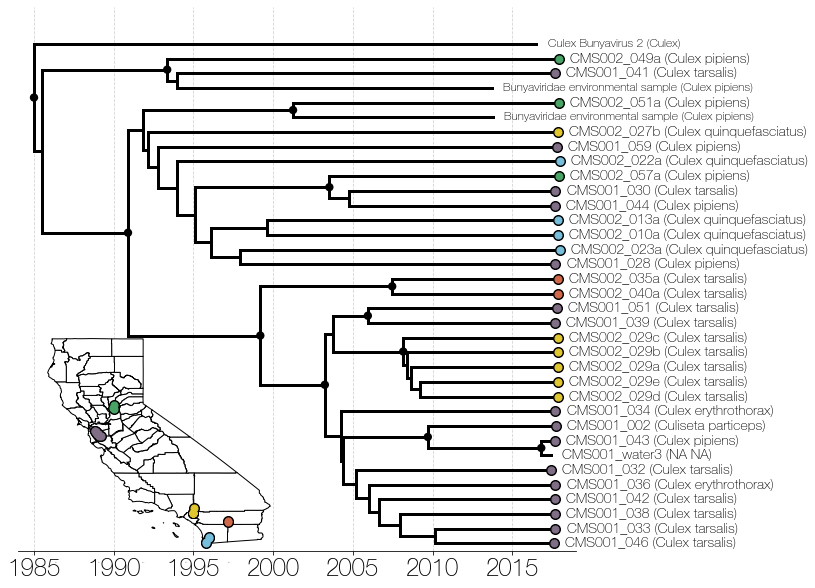

HubeiVirgaLike2_group_RdRp_dated.mcc.tree

Tree height: 27.254716
Tree length: 112.950137
strictly bifurcating tree
annotations present

Numbers of objects in tree: 73 (37 nodes and 36 leaves)



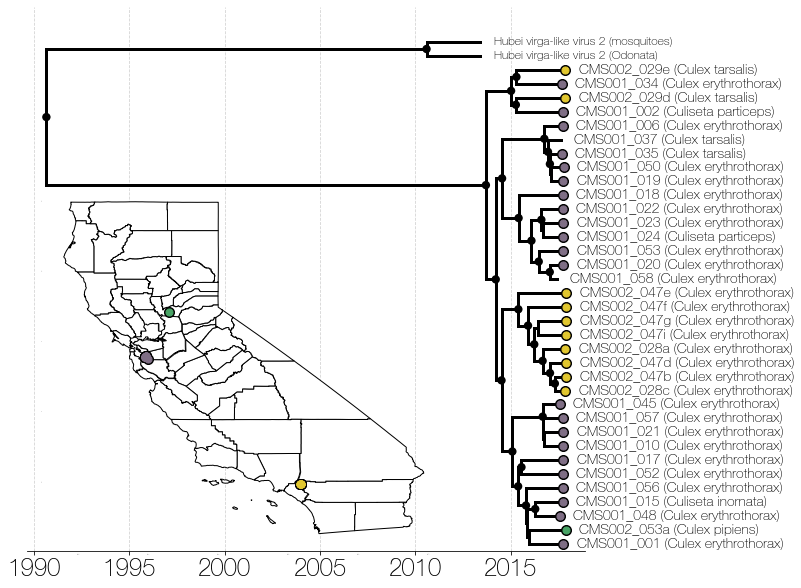

In [3]:
def desaturate(rgb,sat=None,lum=None):
    if isinstance(rgb,str):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given
    elif np.array(rgb).shape[-1]==4: ## if there's four values
        rgb=rgb[:-1]
    elif isinstance(rgb,unicode):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given

    assert 0.0<=sat<=1.0,'Desaturation outside allowed interval'
    assert np.array(rgb).shape[-1]==3,'Incorrect colour array shape'
    hsv=mpl.colors.rgb_to_hsv(rgb) ## convert rgb vector to hue, saturation, value
    if sat!=None:
        hsv[1]=sat ## use provided saturation
    if lum!=None:
        hsv[2]=lum ## use provided luminosity
    
    return mpl.colors.hsv_to_rgb(hsv) ## convert back to rgb


cmap=mpl.cm.Spectral

x_attr=lambda k: k.absoluteTime
    
b_func=lambda k: 3
s_func=lambda k: 70
su_func=lambda k: 140
ct_func=lambda k: cmap(k.y/float(cur_tree.ySpan))
cu_func=lambda k: 'k'
z_func=lambda k: 100
zu_func=lambda k: 99

gb_text_kwargs={'va':'center','ha':'left','size':12,'weight':400}
contig_text_kwargs={'va':'center','ha':'left','size':14,'weight':400}
gb_hits=lambda k: k.branchType=='leaf' and k.name.startswith('CMS')==False
contigs=lambda k: k.branchType=='leaf' and k.name.startswith('CMS')
contig_description=lambda k: '%s (%s)'%('_'.join(k.name.split('|')[0].split('_')[:2]),meta(k))

gb_description=lambda k: '%s (%s)'%(k.name.split('|')[0].replace('_',' '),k.name.split('|')[1])

sampleID=lambda k: k.name.split('|')[0]
meta=lambda k: ' '.join([metadata[sampleID(k)][x] for x in ['compute_genus', 'compute_species']])


for base_path,dirname,fnames in os.walk('/Users/evogytis/Dropbox/Jupyter_notebooks/Biohub/California_mosquitoes/'):
    for fname in fnames:
        if fname.endswith('mcc.tree') and fname.startswith('WMV')==False:
            print(fname)
            fig,ax = plt.subplots(figsize=(10,10),facecolor='w')
            
            ll=bt.loadNexus(os.path.join(base_path,fname))
            ll.treeStats()
            
            ll.plotTree(ax,x_attr=x_attr,branchWidth=b_func)
            ll.plotPoints(ax,target=lambda k:k.branchType=='node' and k.traits['posterior']>0.5,x_attr=x_attr,size_function=s_func,colour_function=cu_func,zorder_function=zu_func)
            
            for k in ll.getExternal(gb_hits):
                host=k.name.split('|')[1]
#                 print(host)
                if host=='Culex_sp._mosquito':
                    host='Culex'
                elif host=='Culex_pipiens':
                    host='Culex pipiens'
                name='%s (%s)'%(k.name.split('|')[0].replace('_',' '),host)
                ax.text(k.absoluteTime+0.7,k.y,name,**gb_text_kwargs)
            ll.addText(ax,position=lambda k: (k.absoluteTime+0.7,k.y),target=contigs,text=contig_description,**contig_text_kwargs)

            mapSize=0.55
            if 'Bunya' in fname:
                mapSize=0.34
            subax = fig.add_axes([0.15,0.105,mapSize,mapSize],facecolor='none')
            subax.set_aspect(1)
            subax.tick_params(size=0,labelsize=0)
            [subax.spines[side].set_visible(False) for side in subax.spines]

            for loc in polygons:
                county=PatchCollection(polygons[loc],facecolor='w',edgecolor='k',zorder=1)
                subax.add_collection(county)

            meta_geo_lat=lambda k: float(metadata[sampleID(k)]['collection_lat']) if metadata[sampleID(k)]['collection_lat']!='NA' else None
            meta_geo_lon=lambda k: float(metadata[sampleID(k)]['collection_long']) if metadata[sampleID(k)]['collection_long']!='NA' else None

            lats=list(map(float,filter(None,map(meta_geo_lat,ll.getBranches(contigs)))))
            lons=list(map(float,filter(None,map(meta_geo_lon,ll.getBranches(contigs)))))
            
            norm_lat=mpl.colors.Normalize(vmin=min(lats),vmax=max(lats))
            norm_lon=mpl.colors.Normalize(vmin=min(lons),vmax=max(lons))            

            for k in ll.getBranches(contigs):
                if meta_geo_lat(k):
                    colour=desaturate(cmap(norm_lat(meta_geo_lat(k))),sat=0.4)
                    colour=sample_colour[metadata[sampleID(k)]['collected_by']]
                    subax.scatter(meta_geo_lon(k),meta_geo_lat(k),s=50,
                                  facecolor=colour,zorder=100)
                    subax.scatter(meta_geo_lon(k),meta_geo_lat(k),s=100,facecolor='k',zorder=99)
                    ax.scatter(k.absoluteTime,k.y,s=50,facecolor=colour,zorder=100)
                    ax.scatter(k.absoluteTime,k.y,s=100,facecolor='k',zorder=99)

            [ax.spines[loc].set_visible(False) for loc in ax.spines if loc!='bottom']

            ax.tick_params(axis='x',labelsize=24)
            ax.tick_params(axis='y',size=0)
            ax.set_yticklabels([])

            ax.grid(axis='x',ls='--',color='lightgrey',zorder=0)

            ax.set_ylim(0,ll.ySpan+2) ## set y limits
            ax.set_xlim(ll.root.absoluteTime-1,ll.mostRecent+1)
            
            if 'HubeiVirga' in fname:
                out_name='Hubei_virgalike_2'
            elif 'CulexBunyavirus2' in fname:
                out_name='Culex_Bunyavirus_2'
            plt.savefig('/Users/evogytis/Documents/manuscripts/skeeters/figures/%s.timetree.png'%(out_name),
                        dpi=300,bbox_inches='tight')
            plt.savefig('/Users/evogytis/Documents/manuscripts/skeeters/figures/%s.timetree.pdf'%(out_name),
                    dpi=300,bbox_inches='tight')
            
            plt.show()